# $\normalsize \S1$: Growth

## California Income and Real Estate Value: Data Analysis
---

## Contents
* __1.1 Overview__
    * 1.1.1 Background
    * 1.1.2 Data
    * 1.1.3 Topics


* __Preface to Analysis: Analysis Approach__

    
* __1.2: Analysis of Income__
    * 1.2.1 Distribution Analysis of Changes in Income Brackets
    * 1.2.2 Clustering Changes in Income Distributions
    * 1.2.3 Ranking Clusters: Income-Growth Health Scores (IGHS)
    
    
* __1.3: Analysis of Real Estate Value__
    * 1.3.1 Distributions of ZHVI Growth
    * 1.3.2 Portfolios of ZHVI Medians
    * 1.3.3 IGHS and ZHVI Growth Correlations


* __Case Studies__
    * Santa Clara
    * Mendocino County
    

# 1.1 Overview
---
## Introduction
In this workbook, we study income data within regions in California and their relationship to real estate prices in those corresponding regions. We first seek to classify regions based on income distribution patterns exhibited over given time periods. Having obtained these classes, we then describe a function to map these classes into a space which reflects each class's potential for growth in real estate value. This function will take statistical characteristics of each class as input and will be designed to output a metric that can be directly compared between classes. Since in general each class will contain several different regions, mapping the whole class to a certain level of potential growth will not guarantee that all regions belonging to that class will grow at that predicted level. Instead, the aim of the function will be to create an ordering which reflects the likely (probabilistic) behavior of real estate prices *relative to each other*.

__We define *regions* as geographical areas in California with the same US postal zip code. Within this workbook, the terms 'region' and 'zip code' may be used interchangeably.__ There are many variables which affect prices in any market, so it is important to note that we do not (and cannot, for various reasons) hold all other relevant variables constant in this exploratory project. By incorporating more types of information we expect to gain better models, but for this project we will study income distributions in isolation. We will, however, study income distributions over several time periods to reduce the likelihood of measuring results due to chance, in addition to studying entire distributions of regions corresponding to different classes (rather than studying individual regions).

*That is, although we cannot hold all other relevant variables constant, we assume our approach of measuring samples of regions rather than individual regions helps to "zero-out" the average changes that occur in relevant un-modeled variables&mdash;especially when measured over several time periods.*

## 1.1.1 Background
The prices for real estate in a region are dependent on demand for those properties. __We define *demand* as the aggregate desire\* and purchasing ability of a population of market participants.__  With a sufficient increase in demand, suppliers will be able to increase prices yet still have buyers willing and able to purchase the properties at these higher price points. Assuming that market participants are self-interested and well-informed, suppliers will indeed raise offered prices for their own benefit. (Considering the nature of market competition, this is a reasonable assumption.) Over time, then, prices for a set of properties will tend to rise as new prices are established as the norm.

Purchasing ability is proportional to income and population, so an increase in income levels (measured by income distribution, to be explored later) results in an increase in demand and an eventual increase in market prices under the assumption of non-decreasing population.\*\* Related as they may be, purchasing ability and housing prices in a region will not change in lock-step under the hypotheses we will test. After an initial increase in purchasing ability, the entirety of the effect on market prices will be realized at a later time. This is because a population's purchasing ability only affects market prices after participants in the market have had the opportunity to interact with agents supplying real estate, bid against each other, spread market sentiment, etc. That is, the information regarding demand of a population takes time to propogate through the market and actually affect prices. __*In particular, we will test the efficient-market hypothesis as it applies to the housing market, by measuring the speed and extent to which housing prices adjust to new income information. We define 'new information' as a change in the state of an economy, which may not necessarily mean the formal publication of the information. Based on the extent of our results, we will see which form of the EMH is best supported (weak, semi-strong, strong).*__

Thus, we will see how income information during a time period can be used as a guide for how housing prices will change during that time period, as well as for how housing prices may change during a directly subsequent time period. This will be potentially because of the aforementioned delay in information propogation through the market, but it is important to note that this will become less reliable as we project further into the future&mdash;to accurately model future prices, we would need to incorporate new information from those subsequent periods. 

\**We will assume that the desire of a population for real estate is roughly constant. This is a strong assumption, but is a component that we cannot practically model for this project.*

\*\**Note: we do not include information about population, which we theoretically should, to better model aggregate demand. California's population increased by about 2.4 million from 2007 to 2014, so it is reasonable to assume that on average over entire classes of regions, populations did not decrease.*



## 1.1.2 Data
#### Income

In the first part of this notebook, we study a data set released by the U.S. Internal Revenue Service (IRS) representing counts of income tax returns&mdash;separated by zip code and income brackets. In essence, the data set contains a five dimensional time series for each zip code (one dimension for each income bracket) over the 7 year period from 2007 to 2014.


  * Cells represent the number of filed tax returns with a given zip code, income bracket, and year
  * Columns represent data from different years


We will limit our analysis to income brackets which can be reasonably assumed to reflect demand in the housing market; thus, our proportions are not the total proportions over these regions, but are the proportions over regions' housing market participants (we will assume a cutoff of earning over $25,000 annually).


Income Brackets:
  * 1: \$25,000 - \$50,000 
  * 2: \$50,000 - \$75,000 
  * 3: \$75,000 - \$100,000 
  * 4: \$100,000 - \$200,000 
  * 5: \$200,000 + 

#### Real Estate Value

In the second part of this notebook, we study a data set released by Zillow Research containing time series of real estate value estimates. In particular, we study a metric coined the "Zillow Home Value Index" (ZHVI), where each time series represents the median ZHVI for a zip code in California. 

ZHVI is one of many possible approaches to creating an index to approximate real estate value. The metric is derived using sales price estimates from sold and unsold homes to create a benchmark for real estate value in different geographical regions. Sales price estimates are computed using comparable real estate properties in similar regions together with various statistical and machine learning models. The details of ZHVI will not be fully explored in this notebook and we will simply note that ZHVI is a reflection of real estate price levels, so analyzing the metric will give us an idea of how the 'true real estate value' of different regions changed. More about ZHVI can be found here: https://www.zillow.com/research/zhvi-methodology-6032/

**This ZHVI data set was collected from an independent source from the IRS data set, and our goal here is to find statistically significant patterns in the ZHVI data set after classifying the data based on characteristics of the IRS data.**

## 1.1.3 Topics:

  * __Part One:__ Given regions and time periods, we study income distributions and their behavior over time
      * Distribution analysis of changes within income brackets
      * Classification of zip codes, with changes in income brackets as features
      * Ordering of classes, with the aim of measuring relative levels of income-growth 
  
  
  * __Part Two:__ Given the classes computed in part one, we study the corresponding behavior of real estate value
      * Distributions of ZHVI growth over selected windows of time
      * Growth of samples of real estate medians (hypothetical portfolios of properties)
      * Correlations between growth in income and growth in real estate value
  
  ---

__* We begin this notebook with a preliminary explanation of our approach to measuring patterns in income distributions as they change over time.*__

# Preface to Analysis

## Analysis Approach: Changes in Income Distribution

Within a zip code, we measure changes over time in the proportions of the counts of tax returns in each bracket. This enables us to identify and group together regions with similar changes in income distributions. __For a given zip code $zc$ and year $t_i$, we define the *income distribution* as the five dimensional vector composed of the percentages that each income bracket represents out of the total in that year and zip code.__ We are interested in the changes of these vectors between time periods.

$$\Large Income Distribution = {\vec{v}}_{zc;t_i} = (\%_{1},\%_{2},\%_{3},\%_{4},\%_{5})^T$$



$$\Large \Delta Income Distribution =  {\vec{w}}_{zc;t_1,t_2} = {\vec{v}}_{zc,t_2} - {\vec{v}}_{zc,t_1}  = (\Delta\%_{1},\Delta\%_{2},\Delta\%_{3},\Delta\%_{4},\Delta\%_{5})^T$$

We will denote the components: $$\Large \vec{w} = (w_1,w_2,w_3,w_4,w_5)^T$$

Thus, the components of ${\vec{w}}_{zc;t_1,t_2}$ represent the net change in percentage of each bracket's makeup of the total count between the start year $t_1$ and the end year $t_2$. __A positive value in a component of this vector implies that a greater proportion of a region's residents earned that income level at the end of the time period than in the beginning. The reverse is true for a negative value.__ Since a decrease in the percentage of one bracket is only made possible with the increase in the percentage makeup of another, it is also true that the components of ${\vec{w}}$ must sum to 0.

__$\vec{w}$ will be our way of measuring levels of income-growth. We must still develop an approach to transform each $\vec{w}$ to a space that can be more directly interpreted as "income-growth," but it is important for now to note that we assume $\vec{w}$ to be a direct reflection of this quantity. (That is, similar\* $\vec{w}$ imply similar levels of income-growth.) So, when we refer to "changes in income distribution" for a region and time window, we precisely mean $\vec{w}$.__

Below, we show some examples of ${\vec{v}}$ and ${\vec{w}}$, as well as a visual exploration of these concepts.

*Note: each ${\vec{w}}_{zc;t_1,t_2}$ is defined by a zip code and window of time, but we will drop the subscript to ease the notation for the rest of the notebook as ${\vec{w}}$ whenever there is no need to clarify ambiguity.*

\** To be concrete, by "similar" we mean Euclidean distance of small magnitude. More details follow in the section on classification.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os.path 
import math
import seaborn as sns

sns.set_style('whitegrid')

%matplotlib inline

In [2]:
# remove the lowest income bracket: they are not participants in the housing market

ca_tax = pd.read_csv(os.getcwd()+'\data_clean\ca tax returns.csv')
ca_tax['zipcode'] = ca_tax['zipcode'].astype(str)
ca_tax = ca_tax[ca_tax['gross_income_bracket']!='0: < 25,000']
ca_tax = ca_tax.set_index(['zipcode','gross_income_bracket'])

In [3]:
# normalizing the data set so the cells are *proportions* of the total market participants in that region, for the given year

zipcodes = ca_tax.index.levels[0]
ca_tax_normalized = ca_tax
for zc in zipcodes:
    for col in ca_tax.columns:
        ca_tax_normalized.loc[zc][col] = ca_tax.loc[zc][col]/ca_tax.loc[zc][col].sum()

In [4]:
# relabel columns for clarity

relabel = {}
yr = 2007
for col in ca_tax_normalized.columns:
    
    relabel[col] = col + '_%'
    yr+=1
    
ca_tax_normalized = ca_tax_normalized.rename(columns=relabel)
ca_tax_normalized = ca_tax_normalized*100

In [5]:
print(len(np.unique(ca_tax_normalized.index.levels[0].values)))
ca_tax_normalized.tail(5)

1419


tax_returns_2007_%  tax_returns_2008_%  \
zipcode gross_income_bracket                                           
96161   1: 25,000-50,000               28.821266           30.669399   
        2: 50,000-75,000               20.286814           19.808743   
        3: 75,000-100,000              16.124519           15.437158   
        4: 100,000-200,000             24.309199           24.863388   
        5: > 200,000                   10.458202            9.221311   

                              tax_returns_2009_%  tax_returns_2010_%  \
zipcode gross_income_bracket                                           
96161   1: 25,000-50,000               32.037534           31.026566   
        2: 50,000-75,000               19.638070           20.465726   
        3: 75,000-100,000              15.080429           15.185307   
        4: 100,000-200,000             25.268097           24.401443   
        5: > 200,000                    7.975871            8.920958   

                              tax_returns_2011_%  tax_returns_2012_%  \
zipcode gross_income_bracket                                           
96161   1: 25,000-50,000               31.163085           32.035928   
        2: 50,000-75,000               19.152971           17.964072   
        3: 75,000-100,000              15.075853           14.670659   
        4: 100,000-200,000             25.000000           25.149701   
        5: > 200,000                    9.608091           10.179641   

                              tax_returns_2013_%  tax_returns_2014_%  
zipcode gross_income_bracket                                          
96161   1: 25,000-50,000               30.571429           29.444444  
        2: 50,000-75,000               17.714286           17.777778  
        3: 75,000-100,000              14.571429           13.611111  
        4: 100,000-200,000             26.285714           26.666667  
        5: > 200,000                   10.857143           12.500000

We have a data set with 1418 distinct zip codes; '0' represents California's total.

In [6]:
# income distributions v defined by {zc = 90001, t1 = 2007} and {zc = 90001, t2 = 2014}
# components of v (percentages) must sum to 100

print(ca_tax_normalized.loc['90001']['tax_returns_2007_%'])
print('\n')
print(ca_tax_normalized.loc['90001']['tax_returns_2014_%'])
print('\n')
print(ca_tax_normalized.loc['90001']['tax_returns_2007_%'].values.sum())
print(ca_tax_normalized.loc['90001']['tax_returns_2014_%'].values.sum())

gross_income_bracket
1: 25,000-50,000      77.847924
2: 50,000-75,000      17.129630
3: 75,000-100,000      3.731762
4: 100,000-200,000     1.052189
5: > 200,000           0.238496
Name: tax_returns_2007_%, dtype: float64


gross_income_bracket
1: 25,000-50,000      73.173653
2: 50,000-75,000      19.520958
3: 75,000-100,000      5.029940
4: 100,000-200,000     2.035928
5: > 200,000           0.239521
Name: tax_returns_2014_%, dtype: float64


100.0
100.0


In [7]:
# change in income distribution (w) defined by the above parameters, i.e. {zc = 90001, t1 = 2007, t2 = 2014}
# components of w (changes in %) must sum to 0

print((ca_tax_normalized.loc['90001']['tax_returns_2014_%'] - ca_tax_normalized.loc['90001']['tax_returns_2007_%']))
print('\n')
print(round((ca_tax_normalized.loc['90001']['tax_returns_2014_%'] - ca_tax_normalized.loc['90001']['tax_returns_2007_%']).values.sum(),5))

gross_income_bracket
1: 25,000-50,000     -4.674271
2: 50,000-75,000      2.391328
3: 75,000-100,000     1.298178
4: 100,000-200,000    0.983740
5: > 200,000          0.001025
dtype: float64


-0.0


We can see that for the region defined by 90001 and the time period 2007 - 2014, there was a 4.67% decrease in the lowest bracket's makeup out of the total housing market participants as well as increases in all the four higher brackets. The income distribution is changing such that a greater proportion of individuals are earning salaries that land them in the higher four brackets&mdash;i.e. purchasing ability in this region has grown over this time period.

*Note: purchasing ability, as we have defined it, will generally increase all over California. This is due to the tendency for incomes to rise over time in general as well as inflation among other factors. Ultimately, we will measure growth in purchasing ability* \**relative to other regions*\* *to identify regions with significant growth in demand.*

California Change in Income Distribution: 2007 to 2011
[-0.39098722 -0.39655515 -0.03806277  0.66100489  0.16460025]

California Change in Income Distribution: 2011 to 2014
[-2.14172457 -0.96737868 -0.30853015  1.48572526  1.93190814]

California Change in Income Distribution: 2007 to 2014
[-2.53271178 -1.36393383 -0.34659292  2.14673014  2.0965084 ]


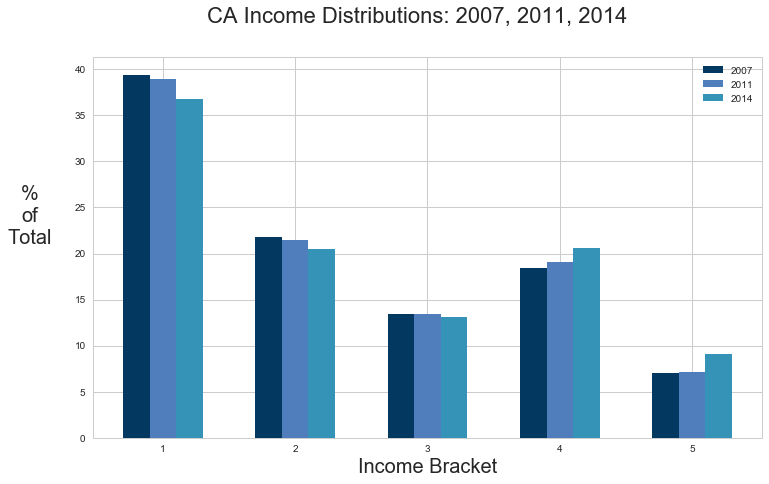

In [8]:
f, ax2 = plt.subplots(1, 1, sharey=True,figsize=(12,7))

ax2.bar([1-0.2,2-0.2,3-0.2,4-0.2,5-0.2],ca_tax_normalized.loc['0']['tax_returns_2007_%'],width=0.2,facecolor='#033860')
ax2.bar([1,2,3,4,5],ca_tax_normalized.loc['0']['tax_returns_2011_%'],width=0.2,facecolor='#507DBC')
ax2.bar([1+0.2,2+0.2,3+0.2,4+0.2,5+0.2],ca_tax_normalized.loc['0']['tax_returns_2014_%'],width=0.2,facecolor='#3493B7')
ax2.set_xlabel('Income Bracket',fontsize=20)
ax2.set_ylabel('%\nof\nTotal',fontsize=20,rotation=0,labelpad=45)
ax2.legend(['2007','2011','2014'])

plt.suptitle('CA Income Distributions: 2007, 2011, 2014', fontsize=22)

print('California Change in Income Distribution: 2007 to 2011')
print((ca_tax_normalized.loc['0']['tax_returns_2011_%'] - ca_tax_normalized.loc['0']['tax_returns_2007_%']).values)
print('\nCalifornia Change in Income Distribution: 2011 to 2014')
print((ca_tax_normalized.loc['0']['tax_returns_2014_%'] - ca_tax_normalized.loc['0']['tax_returns_2011_%']).values)
print('\nCalifornia Change in Income Distribution: 2007 to 2014')
print((ca_tax_normalized.loc['0']['tax_returns_2014_%'] - ca_tax_normalized.loc['0']['tax_returns_2007_%']).values)


  * 1: \$25,000 - \$50,000 
  * 2: \$50,000 - \$75,000 
  * 3: \$75,000 - \$100,000 
  * 4: \$100,000 - \$200,000 
  * 5: \$200,000 + 

Each set of five like-colored bars represents the income distribution, $\vec{v}$, throughout California for 2007, 2011, and 2014; and the changes between plots, $\vec{w}$, are numerically listed above the graph. (Note that we are visualizing three data points of five dimensional data on a two dimensional plane by separating the plane into five sections.)

As an example, notice the slight increase in proportion of earners who are in the two highest brackets. This is reflected in the vectors ${\vec{w}}$, which have positive values in the fourth and fifth elements. Additionally, all the lower brackets are gradually decreasing between these three time periods&mdash;reflected by the negative values in all the lower three brackets. For California as a whole, the income distributions were relatively stable and unchanging over this time period, but the general trend suggests incomes were rising.

These are some of many possible changes in income distributions. We will measure these patterns over the whole data set, and group together regions which have similar ${\vec{w}}$ for the given time period. 

----


__*Now that we have established an approach to measuring changes in income distributions for regions and time periods, we delve into a preliminary analysis of our data set and subsequently move on to processing the data for deeper analysis via classification. We will cluster regions based on their changes in income distributions, $\vec{w}$. Our desired result is a set of vectors, one representing each cluster, which will be used to endow our clusters with an ordering reflective of income-growth.*__

# 1.2 Analysis of Income

## 1.2.1 Distribution Analysis of Changes in Income Brackets

Before analyzing and classifying the data, we first develop a table representing information about changes in income distributions more succinctly. This enables us to study the underlying statistical characteristics more directly, as well as process the data for clustering. To keep a running illustrative example, we create a table of all $\vec{w}$ for 2007 to 2014. That is,

 $$\Large W = \{ \vec{w}_{zc;t_1,t_2} : zc \normalsize \in \Large \{zip~codes~in~data~set\},t_1 = 2007,t_2 = 2014 \}$$

This set gives us a single value for each zip code and income bracket, enabling us to statistically analyze the changes observed all over California during this window of time. By studying the distributions, we can come to a conclusion about what is typical\* behavior for each bracket as well as the typical combinations of values between the five brackets (i.e. clusters).

\* *To be concrete, we will be studying statistical distributions of values within each bracket, and the likelihood of observed values relative to the rest of the data set.*

In [9]:
ca_income_change = pd.DataFrame(columns=['zipcode','1: 25k-50k','2: 50k-75k','3: 75k-100k','4: 100k-200k','5: >200k'])

In [10]:
# create df representing changes in each income bracket from 2007 to 2014

for zc in zipcodes:
    first = ca_tax_normalized.loc[zc].loc['1: 25,000-50,000']['tax_returns_2014_%'] - ca_tax_normalized.loc[zc].loc['1: 25,000-50,000']['tax_returns_2007_%']
    second = ca_tax_normalized.loc[zc].loc['2: 50,000-75,000']['tax_returns_2014_%'] - ca_tax_normalized.loc[zc].loc['2: 50,000-75,000']['tax_returns_2007_%']
    third = ca_tax_normalized.loc[zc].loc['3: 75,000-100,000']['tax_returns_2014_%'] - ca_tax_normalized.loc[zc].loc['3: 75,000-100,000']['tax_returns_2007_%']
    fourth = ca_tax_normalized.loc[zc].loc['4: 100,000-200,000']['tax_returns_2014_%'] - ca_tax_normalized.loc[zc].loc['4: 100,000-200,000']['tax_returns_2007_%']
    fifth = ca_tax_normalized.loc[zc].loc['5: > 200,000']['tax_returns_2014_%'] - ca_tax_normalized.loc[zc].loc['5: > 200,000']['tax_returns_2007_%']
    temp = pd.DataFrame({'zipcode':[zc],'1: 25k-50k':[first],'2: 50k-75k':[second],'3: 75k-100k':[third],'4: 100k-200k':[fourth],'5: >200k':[fifth]})
    ca_income_change = ca_income_change.append(temp)
    
ca_income_change = ca_income_change.set_index('zipcode')
ca_income_change1 = ca_income_change.reset_index()[ca_income_change.reset_index()['zipcode']!='0']
ca_income_change1 = ca_income_change1.set_index('zipcode')

In [11]:
# changes in income distribution (w) for each region: 2007 to 2014
# what is referred to in the report as the set W

ca_income_change1.head()

,1: 25k-50k,2: 50k-75k,3: 75k-100k,4: 100k-200k,5: >200k
zipcode,,,,,
90001,-4.674271,2.391328,1.298178,0.983740,0.001025
90002,-3.706238,1.639324,1.139695,0.927219,0.000000
90003,-3.370728,2.144693,0.718696,0.667275,-0.159936
90004,-3.772951,1.277511,0.392643,1.393961,0.708835
90005,-5.056257,1.734964,1.056504,1.597609,0.667180


In [12]:
ca_income_change.loc[['95460']]

,1: 25k-50k,2: 50k-75k,3: 75k-100k,4: 100k-200k,5: >200k
zipcode,,,,,
95460,1.200911,-3.080151,3.773925,-0.840509,-1.054176


This table represents ${\vec{w}}$ for every zip code in the data set, and is defined by the choice $\{t_1 = 2007,t_2 = 2014\}$. We can study the distributions of each component of these vectors to gain insight on how income brackets all over California changed over the time period. As a caveat, the vectors in the table are derived only from years 2007 and 2014, and do not explicitly include information from years 2008-2013. The justification is that the end point is a reflection and result of what occurred during the time period, so measuring it against the start point gives a simplified representation of the entire period. 

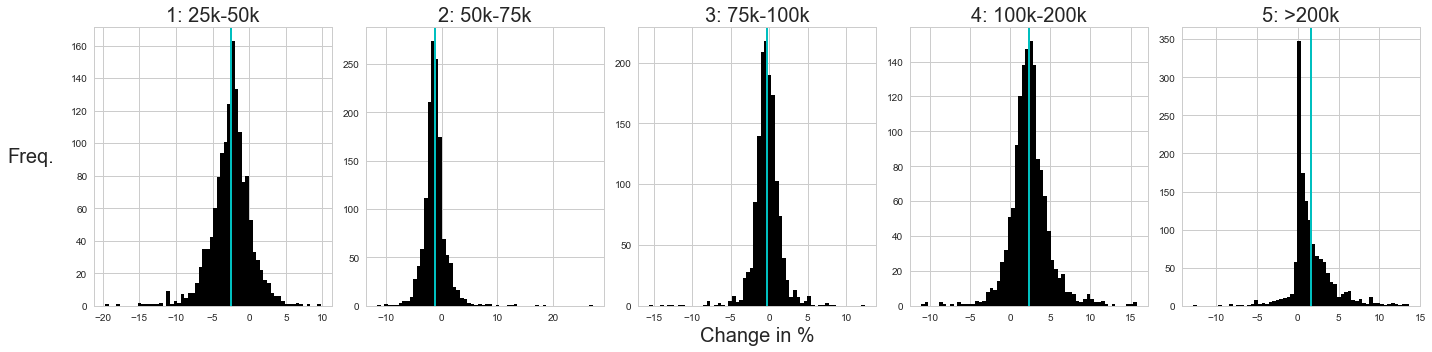

In [13]:
fig = plt.figure(figsize=(20,5))

for i in range(len(ca_income_change1.columns)):
    if i!=5:
            ax1 = fig.add_subplot(1,5,i+1)
            ax1.hist(ca_income_change1[ca_income_change1.columns[i]],bins=60,color='k')
            ax1.axvline(ca_income_change1[ca_income_change1.columns[i]].describe().loc['mean'],color='c',linewidth=2)
            ax1.set_title(str(ca_income_change1.columns[i]),fontsize=20)
            if i==2:
                ax1.set_xlabel('Change in %',fontsize=20)
            if i==0:
                ax1.set_ylabel('Freq.',fontsize=20,rotation=0,labelpad=40)
    
plt.tight_layout()

We can see here that for most regions, the proportion of earners in the lower two brackets is decreasing. This is evident by the majority of the distributions being below 0% (in particular, the means&mdash;marked by the cyan line&mdash;are below 0%). The third income bracket is more centered, resembling a normal distribution with mean 0. Finally, we observe more frequent increases in the higher income brackets (the means are above 0%). This overall pattern suggests that income levels generally increased throughout California, with more regions increasing their purchasing power than not.

Since we have five brackets&mdash;each with its own distribution&mdash;there are many possible combinations of values. We will apply a clustering algorithm to categorize each $\vec{w}$ into one of a set of clusters. (The details regarding clustering will follow in the next section.) Each cluster centroid, then, can be interpreted as the general "behavior" shared by income distributions belonging to that cluster. For example, a centroid with values close to 0 across all brackets can be interpreted as an indicator for stability and lack of change. On the contrary, centroids with large magnitudes for each component indicate greater change over the time period, with many residents moving from one income bracket to another.

After we have separated our data into classes, we will use the distributions above as a standard to measure against. By analyzing kernel density estimation (kde) plots of clusters against the above histograms (normalized, for scaling), we can gain an idea of how income distributions in a cluster tended to change in comparison to the entire data set.

---

## 1.2.2 Clustering Changes in Income Distributions

We apply the K-Means algorithm to classify zip codes into a smaller collection of classes (as opposed to analyzing all 1418 regions individually). We treat each bracket as its own feature to gain insight on the growth or weakening of purchasing power in a region. By grouping together regions with similar $\vec{w}$, we will eventually see if there exists similarity in the behavior of real estate prices between regions with similar changes in income distribution, as well as how pronounced these similarities are. 

In [14]:
cluster_input = ca_income_change1.reset_index()[ca_income_change1.columns]

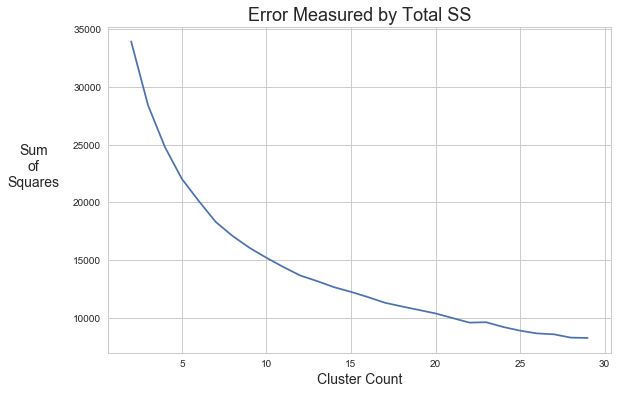

In [15]:
from sklearn.cluster import KMeans

kvalues = list(range(2,30))
ss = []

for k in kvalues:
    kmeans = KMeans(n_clusters=k).fit(cluster_input)
    ss.append(kmeans.inertia_)

f, ax = plt.subplots(1,1,figsize=(9,6))

ax.plot(kvalues,ss)
ax.set_ylabel('Sum\nof\nSquares',fontsize=14,rotation=0,labelpad=40)
ax.set_xlabel('Cluster Count',fontsize=14)
ax.set_title('Error Measured by Total SS',fontsize=18)

The elbow method suggests we use around 12 clusters before we get diminishing returns on our error reduction and avoid overfitting the data. This process can be automated by measuring the error reduction between iteration of adding a cluster count (i.e. approximating the derivative), but we will not explore this.

We will study selected clusters representing types of income growth, interpret the meaning of their properties, and eventually test samples of corresponding zip codes' median real estate prices to see how these prices grew.

In [16]:
# classify each w (i.e. classify each zip code)

kmeans = KMeans(n_clusters=12,random_state=10).fit(cluster_input)
ca_income_change1['cluster'] = kmeans.labels_

In [17]:
# create table to summarize cluster centers and counts

cluster_summary = pd.DataFrame(columns=['1: 25k-50k','2: 50k-75k','3: 75k-100k','4: 100k-200k','5: >200k','cluster'])
for clus in range(np.max(ca_income_change1['cluster'])+1):
    cluster_summary = cluster_summary.append(ca_income_change1[ca_income_change1['cluster']==clus].describe().loc['mean'])
    
cluster_summary['cluster'] = cluster_summary['cluster'].astype(int)
cluster_summary = cluster_summary.reset_index().set_index('cluster')
cluster_summary['count'] = 0

for clus in cluster_summary.index:
    cluster_summary.loc[clus,'count'] = ca_income_change1[ca_income_change1['cluster']==clus].describe().loc['count','cluster']
cluster_summary['count'] = cluster_summary['count'].astype(int)

In [18]:
# centroids for all clusters

cluster_summary = cluster_summary.drop('index',axis=1)
print('Averages Changes in California:')
print(ca_income_change1.drop('cluster',axis=1).mean().values)
cluster_summary

Averages Changes in California:
[-2.51978865 -1.16268599 -0.29671325  2.4008961   1.5782918 ]


,1: 25k-50k,2: 50k-75k,3: 75k-100k,4: 100k-200k,5: >200k,count
cluster,,,,,,
0,-4.746756,-0.869686,0.442174,3.542077,1.632191,200
1,-2.983695,-2.570535,-0.834074,4.943037,1.445268,120
2,1.535650,-4.946841,1.098049,2.542466,-0.229325,59
3,1.038042,-0.942878,-0.962108,0.546975,0.319969,182
4,-2.193332,-1.881707,-0.984469,1.038351,4.021156,199
5,-9.471188,1.983738,1.633733,5.960839,-0.107122,36
6,-1.829289,-1.053150,-0.179817,2.320120,0.742136,377
7,-8.187899,-3.084023,-0.465904,5.772686,5.965140,39
8,-2.903538,-1.464789,-0.665759,9.699227,-4.665141,26


Above, we have a table representing the 12 centroids found by our clustering algorithm as well as an array representing the average changes in California (printed above the table). By comparing the values in each bracket for a given centroid to the corresponding average in California, we gain a sense of clusters' growing earning potential. In particular, large decreases in the lower brackets and large increases in the higher brackets indicate stronger-than-average income growth.

*Note: The cluster numbers are nothing more than labels. The numerical values have no intented relationship to the values of the data.*

### Example: Cluster 9

This group, on average, exhibits significantly high growth in the top bracket as well as considerable shrinkage in all of the lower brackets. For a given region, earners in bracket 1 moving into bracket 2 will decrease the % in bracket 1 of $\vec{w}$ and increase the % in bracket 2. The fact that we see decreases in bracket 2 as well, however, implies that a sizable portion of earners in bracket 2 also moved up into a higher bracket (again, on average, in this cluster). Since this is true across all the lower four brackets, this is indication that earners grew their income potential across all income brackets. In other words, zip codes corresponding to cluster 9 exhibit strong income growth. With all this in mind and our initial assumptions, we will use cluster 9 to represent a region with "good income growth" over this time period.

This cluster represents about 4% of the CA zip codes listed (56 of 1418). Below, we explore more thoroughly the properties of this cluster.

In [19]:
ca_income_change1[ca_income_change1['cluster']==9].describe()

,1: 25k-50k,2: 50k-75k,3: 75k-100k,4: 100k-200k,5: >200k,cluster
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.0
mean,-3.697212,-2.782451,-1.798880,-0.881259,9.159802,9.0
std,1.750903,1.390256,1.205134,2.684999,1.897308,0.0
min,-9.066897,-6.641844,-3.918435,-11.086475,6.450086,9.0
25%,-4.707806,-3.689078,-2.756829,-2.337477,7.652030,9.0
50%,-3.410786,-2.727739,-1.782281,-0.886269,8.877733,9.0
75%,-2.413698,-1.920029,-1.326137,1.141811,10.576921,9.0
max,-0.709534,1.222222,2.904656,4.086148,13.638064,9.0


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


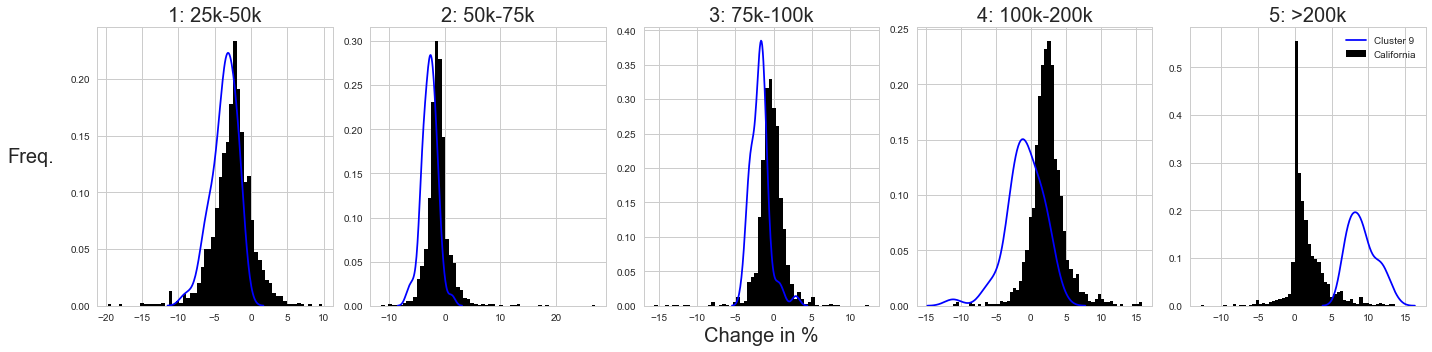

In [20]:
fig = plt.figure(figsize=(20,5))

for i in range(len(ca_income_change1.drop('cluster',axis=1).columns)):
    
        ax1 = fig.add_subplot(1,5,i+1)
        ax1.hist(ca_income_change1[ca_income_change1.columns[i]],bins=60,normed=True,color='k')
        ax1.set_title(str(ca_income_change1.columns[i]),fontsize=20)

        ax1 = fig.add_subplot(1,5,i+1)
        sns.kdeplot(ca_income_change1[ca_income_change1['cluster']==9][ca_income_change1.columns[i]],color='b')
        ax1.set_title(str(ca_income_change1.columns[i]),fontsize=20)
        if i==2:
            ax1.set_xlabel('Change in %',fontsize=20)
        if i==0:
            ax1.set_ylabel('Freq.',fontsize=20,rotation=0,labelpad=40)
        ax1.legend([])
        if i ==4:
            ax1.legend(['Cluster 9','California'])
    
plt.tight_layout()


By comparing the kernel density estimation plots for cluster 9 with the normalized histogram distributions over California, we can see how the cluster behaves relative to the state as a whole. We can see that brackets 1-4 decreased more frequently than California as a whole by observing the blue kde plots' shifts leftward from the black distribution plots. On the contrary, bracket 5's kde plot is centered over a region far right of the state's average&mdash;indicating significant growth in the highest income bracket for most zip codes belonging to cluster 9.

### Example: Cluster 2
As a contrasting example, consider the cluster described below and its lack of growth characteristics that we saw in cluster 9. The lowest income bracket is&mdash;on average&mdash;increasing; and the highest bracket is&mdash;on average&mdash;decreasing. These are two undesirable properties if we are looking for clusters with regions containing healthy income growth.

With all this in mind and our initial assumptions, we will use cluster 2 to represent a region with "bad income growth" over this time period and also further explore the properties of this cluster below.

In [21]:
ca_income_change1[ca_income_change1['cluster']==2].describe()

,1: 25k-50k,2: 50k-75k,3: 75k-100k,4: 100k-200k,5: >200k,cluster
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.0
mean,1.535650,-4.946841,1.098049,2.542466,-0.229325,2.0
std,2.023409,1.851921,2.855777,2.615804,1.597790,0.0
min,-1.936041,-11.505560,-4.799302,-6.289308,-6.756757,2.0
25%,0.160875,-5.305874,-0.489084,0.809838,-0.084298,2.0
50%,1.233766,-4.446198,0.505856,2.841782,0.000000,2.0
75%,2.477025,-3.927550,2.224460,4.006150,0.378643,2.0
max,6.882638,-1.423014,12.403764,9.770115,2.201258,2.0


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


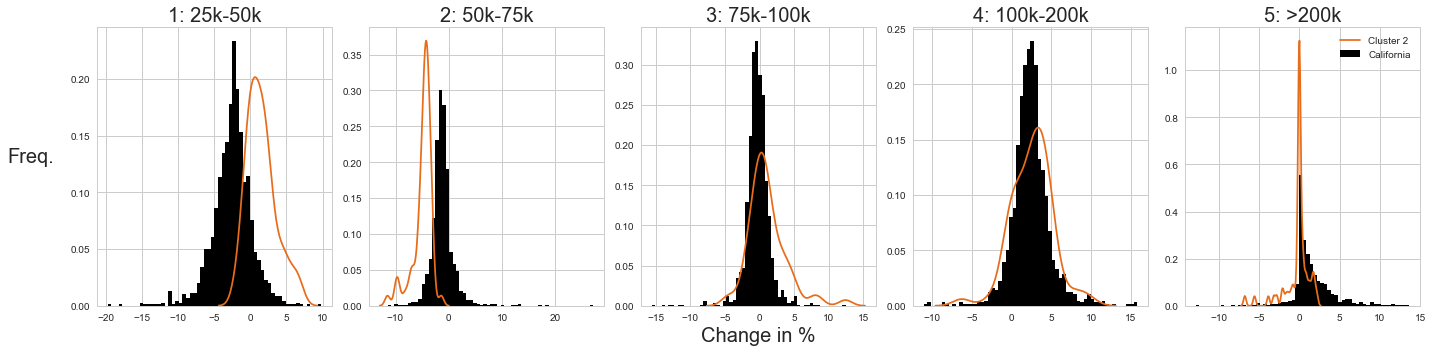

In [22]:
fig = plt.figure(figsize=(20,5))

for i in range(len(ca_income_change1.drop('cluster',axis=1).columns)):
    
        ax1 = fig.add_subplot(1,5,i+1)
        ax1.hist(ca_income_change1[ca_income_change1.columns[i]],bins=60,normed=True,color='k')
        ax1.set_title(str(ca_income_change1.columns[i]),fontsize=20)

        ax1 = fig.add_subplot(1,5,i+1)
        sns.kdeplot(ca_income_change1[ca_income_change1['cluster']==2][ca_income_change1.columns[i]],color='#e86d1b')
        ax1.set_title(str(ca_income_change1.columns[i]),fontsize=20)
        if i==2:
            ax1.set_xlabel('Change in %',fontsize=20)
        if i==0:
            ax1.set_ylabel('Freq.',fontsize=20,rotation=0,labelpad=40)
        ax1.legend([])
        if i ==4:
            ax1.legend(['Cluster 2','California'])
    
plt.tight_layout()


In the kde plots above, we do not observe the statistically significant decreases in the lower brackets (with the exception of bracket 2) and increase in the highest bracket that we saw in cluster 9. In particular, notice that the lowest income bracket tended to *increase* in proportion for regions belonging to this cluster. Additionally, the kde plot of the highest bracket appears to imply that the proportion of earners in this bracket tended to *decrease* (it is concentrated just leftward of California's distribution). These two characteristics intuitively signal a weakening of the population's purchasing ability. Thus, the kde plots for cluster 2 suggest that these regions typically did not exhibit as strong of income growth.


Now that we have an idea of what sort of characteristics of centroids indicate strong income growth for the underlying regions in those clusters, we wish to transform the centroids with a real-valued function so that we are able to rank the corresponding clusters based on their implied strength of income growth.

---

## 1.2.3 Ranking Clusters: Income-Growth Health Scores (IGHS)

As we saw in the examples above, we want to reward clusters with negative values in the lower brackets and positive values in the higher brackets, as well as punish clusters with positive values in the lower brackets and negative values in the higher brackets if we desire to rank clusters based on strength of income growth. We propose taking a linear combination of the centroids' bracket values, where the lower brackets are weighed with smaller values than the higher brackets. This design choice satisfies the aforementioned desire to favor certain changes in respective income brackets which suggest stronger income growth.

Below, we suggest two possible sets of weights to apply to the centroids and rank them based on strength of income growth, represented by the respective functions:

$$\Large f(\vec{w})=-2w_1 - w_2 +w_4 +2w_5$$

$$\Large g(\vec{w})=-w_1 + 0.5w_3 +w_4 +2w_4$$

In [23]:
# the weights are parameters to potentially optimize for
# criteria for valid weights: weight1 < weight2 < weight3 < weight4
# to find regions with increasing income, we always want w1 to decrease since it is the lowest bracket representing
# participants in the housing market. => w1 < 0. 

# respective weights for IGHS: {-2, -1, 0, 1, 2}

def IGHS(x):
    return -2*x['1: 25k-50k'] + -1*x['2: 50k-75k'] + 1*x['4: 100k-200k'] + 2*x['5: >200k']

# respective weights for IGHS2: {-1, 0, 0.5, 1, 2})

def IGHS2(x):
    return -1*x['1: 25k-50k'] + 0.5*x['3: 75k-100k'] + 1*x['4: 100k-200k'] + 2*x['5: >200k']

In [24]:
# apply the functions defined above to the centroids

cluster_summary['IGHS'] = cluster_summary.apply(IGHS,axis=1)
cluster_summary['IGHS2'] = cluster_summary.apply(IGHS2,axis=1)

In [25]:
# normalize the IGHS score

cluster_summary['IGHS'] = (cluster_summary['IGHS'] - cluster_summary['IGHS'].mean())/cluster_summary['IGHS'].std()
cluster_summary['IGHS2'] = (cluster_summary['IGHS2'] - cluster_summary['IGHS2'].mean())/cluster_summary['IGHS2'].std()

In [26]:
cluster_summary.sort_values('IGHS',ascending=False)

,1: 25k-50k,2: 50k-75k,3: 75k-100k,4: 100k-200k,5: >200k,count,IGHS,IGHS2
cluster,,,,,,,,
7,-8.187899,-3.084023,-0.465904,5.772686,5.965140,39,2.073688,2.022374
9,-3.697212,-2.782451,-1.798880,-0.881259,9.159802,56,1.231902,1.350388
5,-9.471188,1.983738,1.633733,5.960839,-0.107122,36,0.799000,0.829652
0,-4.746756,-0.869686,0.442174,3.542077,1.632191,200,0.310942,0.301618
1,-2.983695,-2.570535,-0.834074,4.943037,1.445268,120,0.240570,0.131314
4,-2.193332,-1.881707,-0.984469,1.038351,4.021156,199,0.150422,0.178602
6,-1.829289,-1.053150,-0.179817,2.320120,0.742136,377,-0.452020,-0.470602
8,-2.903538,-1.464789,-0.665759,9.699227,-4.665141,26,-0.529194,-0.793367
10,-3.614268,1.434829,1.373350,0.762242,0.043847,113,-0.617112,-0.519298


We normalize the income-growth health score so that the values are not arbitrary.

We can see above that our function indeed ranks cluster 9 relatively high and ranks cluster 2 relatively low on this growth-health measure. 

In [27]:
cluster_summary.sort_values('IGHS2',ascending=False)

,1: 25k-50k,2: 50k-75k,3: 75k-100k,4: 100k-200k,5: >200k,count,IGHS,IGHS2
cluster,,,,,,,,
7,-8.187899,-3.084023,-0.465904,5.772686,5.965140,39,2.073688,2.022374
9,-3.697212,-2.782451,-1.798880,-0.881259,9.159802,56,1.231902,1.350388
5,-9.471188,1.983738,1.633733,5.960839,-0.107122,36,0.799000,0.829652
0,-4.746756,-0.869686,0.442174,3.542077,1.632191,200,0.310942,0.301618
4,-2.193332,-1.881707,-0.984469,1.038351,4.021156,199,0.150422,0.178602
1,-2.983695,-2.570535,-0.834074,4.943037,1.445268,120,0.240570,0.131314
6,-1.829289,-1.053150,-0.179817,2.320120,0.742136,377,-0.452020,-0.470602
10,-3.614268,1.434829,1.373350,0.762242,0.043847,113,-0.617112,-0.519298
8,-2.903538,-1.464789,-0.665759,9.699227,-4.665141,26,-0.529194,-0.793367


Above, we also observe that different choices of weights will affect the ordering of rank. The tables above are similar, but the different choices of weights favor different types of behavior and will cause the ranking order to slightly change. The optimization of choice of weights is a potential machine-learning problem in itself and will not be discussed in detail within this notebook, but we informally note a suggested approach below:

By combining this data with data representing growth in real estate prices, an "optimal" ranking of centroids is that such that the average real estate price growth seen in clusters ranked higher by the chosen function is higher than that seen by clusters ranked lower. Applying linear regression with the function score as the independent variable and average real estate price growth as the dependent variable, we can assess the quality of the relationship with the usual metrics for assessing a linear fit, e.g. r squared, MSE, and a positive coefficient on the independent variable. Thus, we can propose methods to adjust the weights such that these metrics are improved.

This would be optimizing the weights such that the changes in income correspond to growth in real estate prices (so we would not necessarily be optimizing for income-growth, per se), but the effect of changes in income distributions on real estate prices is ultimately the problem we are concerned with and so this would be the effective end approach.

---

**Having analyzed our income data, transformed it, and endowed the transformation with an ordering, we now move on to studying corresponding real estate prices (the aforementioned ZHVI metric) after first separating the zip codes into the classes we established in part one.**

**The key point here is that the classes were established using our income data set, but we are now studying the ZHVI data set&mdash;an independent source&mdash;with these classes applied to the zip codes. The zip codes are the keys which allow us to relate data from independent sources.**

**We take three different approaches to measuring growth in real estate value, and test the validity of our income-growth health scores as well as analyze our results for their implications in respect to the efficient market hypothesis.**

# 1.3 Analysis of Real Estate Value

## 1.3.1 Distributions of ZHVI Growth

Our first approach to measuring growth in real estate value will be to compute the % return in ZHVI medians for each zip code and analyze the distributions when we separate the data by the clusters we have established while studying income. We do this for each zip code for which we have ZHVI data and for five different windows of time:

 * **Dec. 2007 - Dec. 2014** (7 years overlapping with income data)
 * **Dec. 2014 - Jun. 2015** (6 months following income data)
 * **Dec. 2014 - Dec. 2015** (12 months following income data)
 * **Dec. 2014 - Jun. 2016** (18 months following income data)
 * **Dec. 2014 - Dec. 2016** (24 months following income data)
 
The first 7-year period overlaps with the time window of our income data, whereas the last four windows are 6, 12, 18, and 24 month periods following the time period represented by our income data. Thus, the latter four windows of time are used to test the predictability of our models in using income data to measure future changes in real estate value.

For this section, we continue our analysis of cluster 2 and cluster 9 for the sake of illustration. 

In [28]:
zhvi_growth = pd.read_csv(os.getcwd()+'\data_clean\zhvi.csv')
zhvi_growth = zhvi_growth[zhvi_growth['State']=='CA']
zhvi_growth = zhvi_growth.rename(columns={'RegionName':'zipcode'}).set_index('zipcode')
zhvi_growth = zhvi_growth.drop(['RegionID','City','State','Metro','CountyName','SizeRank'],axis=1)

In [29]:
growth_dict = {}
for CN in range(15):
    temp_df = pd.DataFrame(columns=['zipcode','growth1','growth2','growth3','growth4','growth5'])
    for zc in ca_income_change1[ca_income_change1['cluster']==CN].index.astype(int).values:
        if zc in zhvi_growth.index.values:
            temp = {'zipcode':zc,
                    'growth1':zhvi_growth.loc[zc,'2014-12']/zhvi_growth.loc[zc,'2007-12'],
                    'growth2':zhvi_growth.loc[zc,'2015-06']/zhvi_growth.loc[zc,'2014-12'],
                    'growth3':zhvi_growth.loc[zc,'2015-12']/zhvi_growth.loc[zc,'2014-12'],
                    'growth4':zhvi_growth.loc[zc,'2016-06']/zhvi_growth.loc[zc,'2014-12'],
                    'growth5':zhvi_growth.loc[zc,'2016-12']/zhvi_growth.loc[zc,'2014-12']}
            temp_df = temp_df.append(temp,ignore_index=True)
    temp_df['growth1'] = (temp_df['growth1'] - 1)*100
    temp_df['growth2'] = (temp_df['growth2'] - 1)*100
    temp_df['growth3'] = (temp_df['growth3'] - 1)*100
    temp_df['growth4'] = (temp_df['growth4'] - 1)*100
    temp_df['growth5'] = (temp_df['growth5'] - 1)*100
    temp_df['zipcode'] = temp_df['zipcode'].astype(int)
    temp_df = temp_df.set_index('zipcode')
    growth_dict[CN] = temp_df

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


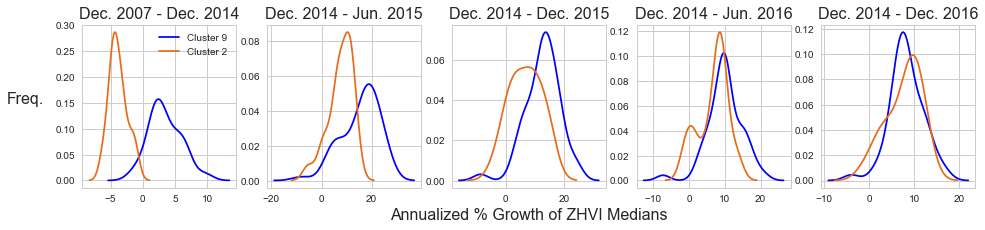

In [30]:
# growth %

fig = plt.figure(figsize=(16,3))

time_windows = ['Dec. 2007 - Dec. 2014',
                'Dec. 2014 - Jun. 2015',
                'Dec. 2014 - Dec. 2015',
                'Dec. 2014 - Jun. 2016',
                'Dec. 2014 - Dec. 2016']
annualize = [7,0.5,1,1.5,2]

for i in range(1,6):
    ax = fig.add_subplot(1,5,i)
    sns.kdeplot(growth_dict[9][growth_dict[9].columns[i-1]]/annualize[i-1],color='b')
    sns.kdeplot(growth_dict[2][growth_dict[2].columns[i-1]]/annualize[i-1],color='#e86d1b')
    plt.title(time_windows[i-1],fontsize=16)
    if i==1:
        plt.legend(['Cluster 9','Cluster 2'])
        plt.ylabel('Freq.',fontsize=16,rotation=0,labelpad=30)
    if i!=1:
        plt.legend([])
    if i==3:
        plt.xlabel('Annualized % Growth of ZHVI Medians',fontsize=16)


In the plots above, the % growth is annualized so the length of time is taken into account for each period. We see that  the annualized return is, in general, much lower in the leftmost plot than in the right four (observe the values on the x-axis). This is likely due to the economic downturn of 2007-2009 in the housing market&mdash;causing the overall rate of return to be much lower. 

The key point, however, is that the kde plots in the leftmost graph are separated more distinctly in comparison with the right four plots. Although we still tend to see regions in cluster 9 grow at a greater % than regions in cluster 2 in the right four plots, the distirbutions overlap much more than they do in the leftmost plot. 

This suggests that the classification we established by studying income data is a good indicator for real estate value growth *only when measuring over the same time period.* When we try to predict future changes in real estate value, our classification becomes less reliable as we see a greater overlap in the the distributions of % growth.

## 1.3.2 Portfolios of ZHVI Medians

Our next approach to testing the validity of our income-growth health scores will be to measure the aggregate returns in samples of ZHVI medians when we separate the regions by the classification established in studying income.

In (2.1) we computed the % returns of individual zip codes and subsequently classified the zip codes to establish distributions. Here, we reverse the approach: we first classify the zip codes into their respective groups and subsequently measure the % return of the sum of the samples. That is, we create hypothetical portfolios of real estate properties and study their performance. 

For this section, we continue to study cluster 2 and cluster 9's relative performance for ease of illustration. Note that for NaN values in the time series, we will fill the value with the corresponding means of the portfolio.

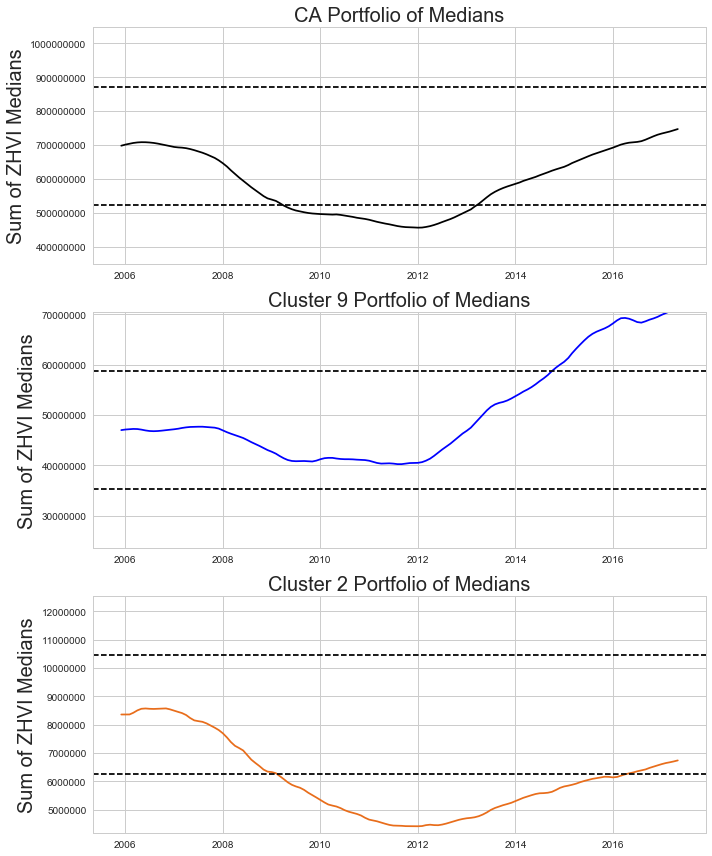

In [31]:
# portfolio of the houses in clusters 9 and 2 

dates9 = pd.to_datetime(zhvi_growth.loc[growth_dict[9].index.values].fillna(zhvi_growth.loc[growth_dict[9].index.values].mean()).sum()[116:].index)
prices9 = zhvi_growth.loc[growth_dict[9].index.values].fillna(zhvi_growth.loc[growth_dict[9].index.values].mean()).sum()[116:].values

dates2 = pd.to_datetime(zhvi_growth.loc[growth_dict[2].index.values].fillna(zhvi_growth.loc[growth_dict[2].index.values]).sum()[116:].index)
prices2 = zhvi_growth.loc[growth_dict[2].index.values].fillna(zhvi_growth.loc[growth_dict[2].index.values].mean()).sum()[116:].values

datesCA = pd.to_datetime(zhvi_growth.fillna(zhvi_growth.mean()).sum()[116:].index)
pricesCA = zhvi_growth.fillna(zhvi_growth.mean()).sum()[116:]

f, ((ax3,ax1,ax2)) = plt.subplots(3,1,figsize=(10,12))

ax1.plot(dates9,prices9,'b')
ax1.set_title('Cluster 9 Portfolio of Medians',fontsize=20)
ax1.set_ylim([prices9[0]*0.5,prices9[0]*1.5])
#ax1.axvspan(xmin=dates9[100],xmax=dates9.max(),alpha=0.2)
ax1.ticklabel_format(axis='y',style='plain')
ax1.axhline(prices9[0]*0.75,color='k',linestyle='--')
ax1.axhline(prices9[0]*1.25,color='k',linestyle='--')
ax1.set_ylabel('Sum of ZHVI Medians',fontsize=20)

ax2.plot(dates2,prices2,'#e86d1b')
ax2.set_title('Cluster 2 Portfolio of Medians',fontsize=20)
ax2.set_ylim([prices2[0]*0.5,prices2[0]*1.5])
#ax2.axvspan(xmin=dates2[100],xmax=dates2.max(),alpha=0.2)
ax2.ticklabel_format(axis='y',style='plain')
ax2.axhline(prices2[0]*0.75,color='k',linestyle='--')
ax2.axhline(prices2[0]*1.25,color='k',linestyle='--')
ax2.set_ylabel('Sum of ZHVI Medians',fontsize=20)

ax3.plot(datesCA,pricesCA,'k')
ax3.set_title('CA Portfolio of Medians',fontsize=20)
ax3.set_ylim([pricesCA[0]*0.5,pricesCA[0]*1.5])
#ax3.axvspan(xmin=datesCA[100],xmax=datesCA.max(),alpha=0.2)
ax3.ticklabel_format(axis='y',style='plain')
ax3.axhline(pricesCA[0]*0.75,color='k',linestyle='--')
ax3.axhline(pricesCA[0]*1.25,color='k',linestyle='--')
ax3.set_ylabel('Sum of ZHVI Medians',fontsize=20)

plt.tight_layout()


Above, we plot the sums of medians for clusters 9 and 2 (for which we had available ZHVI data) as well as the sums of medians for all zip codes in our ZHVI dataset (an approximation for California as a whole). The two bottom plots intuitively correspond to how portfolios of real estate would perform during this period, if the portfolio contained properties with the median value for each zip code.

For each plot, the vertical axis limits are set such that the min/max represent a -/+ 50% change from the earliest price plotted. Additionally, the dashed horizontal lines represent the -/+ 25% change from the earliest price plotted. Thus, the scaling is set such that we accurately portray the net % change as they compare from plot to plot. We can see that in comparison to California as a whole, regions from cluster 9 were much more resilient against the loss that occurred from 2007 to 2014. On the contrary, cluster 2 lost even more value during that time period. 

* California portfolio contains 1199 zip codes
* Cluster 9 portfolio contains 52 zip codes 
* Cluster 2 portfolio contains 21 zip codes

Below, we study re-scaled plots representing the time period from Dec. 2014 onwards, in order to similarly show the accurately portrayed % growth. This is a simulation of how our portfolios would have performed if we used our income data from 2007 - 2014 to enter the market in Dec. 2014.

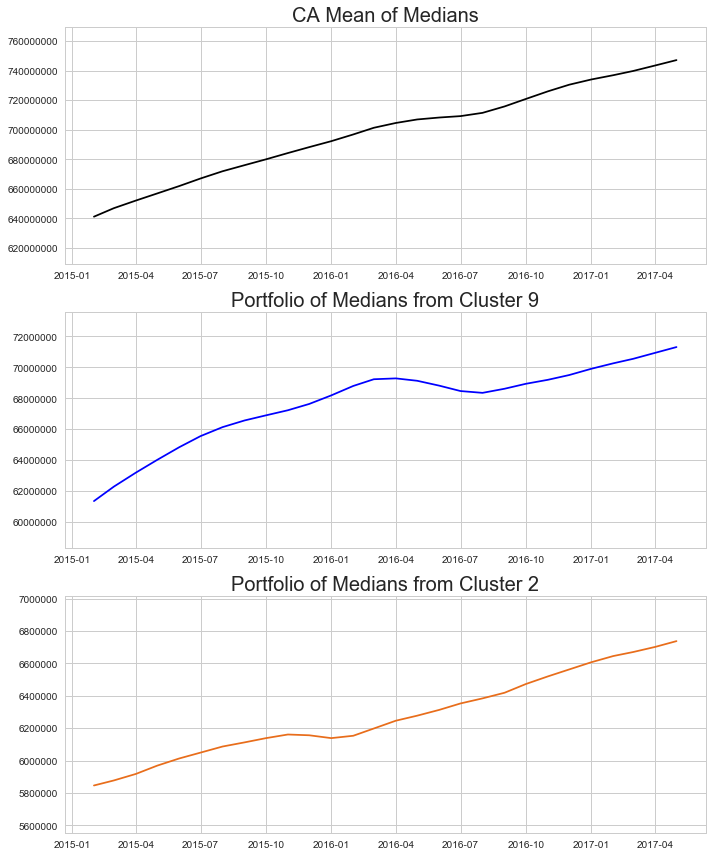

In [32]:
dates9 = pd.to_datetime(zhvi_growth.loc[growth_dict[9].index.values].fillna(zhvi_growth.loc[growth_dict[9].index.values].mean()).sum()[226:].index)
prices9 = zhvi_growth.loc[growth_dict[9].index.values].fillna(zhvi_growth.loc[growth_dict[9].index.values].mean()).sum()[226:].values

dates2 = pd.to_datetime(zhvi_growth.loc[growth_dict[2].index.values].fillna(zhvi_growth.loc[growth_dict[2].index.values]).sum()[226:].index)
prices2 = zhvi_growth.loc[growth_dict[2].index.values].fillna(zhvi_growth.loc[growth_dict[2].index.values].mean()).sum()[226:].values

datesCA = pd.to_datetime(zhvi_growth.fillna(zhvi_growth.mean()).sum()[226:].index)
pricesCA = zhvi_growth.fillna(zhvi_growth.mean()).sum()[226:]

f, ((ax3,ax1,ax2)) = plt.subplots(3,1,figsize=(10,12))

ax1.plot(dates9,prices9,'b')
ax1.set_title('Portfolio of Medians from Cluster 9',fontsize=20)
ax1.set_ylim([prices9[0]*0.95,prices9[0]*1.2])
ax1.ticklabel_format(axis='y',style='plain')
#ax1.axvspan(xmin=dates9[0],xmax=dates9.max(),alpha=0.2)

ax2.plot(dates2,prices2,'#e86d1b')
ax2.set_title('Portfolio of Medians from Cluster 2',fontsize=20)
ax2.set_ylim([prices2[0]*0.95,prices2[0]*1.2])
ax2.ticklabel_format(axis='y',style='plain')
#ax2.axvspan(xmin=dates2[0],xmax=dates2.max(),alpha=0.2)

ax3.plot(datesCA,pricesCA,'k')
ax3.set_title('CA Mean of Medians',fontsize=20)
ax3.set_ylim([pricesCA[0]*0.95,pricesCA[0]*1.2])
ax3.ticklabel_format(axis='y',style='plain')
#ax3.axvspan(xmin=datesCA[0],xmax=datesCA.max(),alpha=0.2)

plt.tight_layout()

Here, the axis limits are set such that the maximum is +20% and the minimum is -5% from the start point of the plotted period. We can see a slightly favorable amount of growth in the plot for cluster 9, but the significance of the apparent difference is less significant in comparison to the earlier three plots&mdash;because we have correctly scaled the plots. Furthermore, the growth of cluster 9's portfolio slows down around April 2016 and reaches a level about equal to the other two portfolios. This suggests that the utility of income data is highly limited in predicting the changes of real estate values in future periods.

__*This result supports the strong form of the efficient market hypothesis in the real estate market, in respect to income information and its relationship to real estate growth. Changes in real estate value are highly related to changes in income when we measure the changes over the same time period, but the relationship is much less pronounced when we attempt to relate the data to predict future price changes. This result suggests that real estate prices respond to changes in income ("new information") very quickly. In order to model future price movements, it seems we need future income data (that is, we cannot reliably predict price movements with past data).*__

---

## 1.3.3 IGHS and ZHVI Growth Correlations

Now, we step away from studying clusters 9 and 2 in isolation and instead look at the behavior of all of the clusters. We revisit the income-growth health score and its correlation to average real estate value growth in regions corresponding to distinct clusters. 

This is similar to the approach we took in (2.2) in that we first aggregate the regions and subsequently measure their growth, but we return to studying the five windows of time established in (2.1) so that we can plot an aggregate % return for each cluster portfolio in a more succinct manner.

Since we are also visualizing the income-growth health score, this approach gives us a better representation of the relationship between income-growth health score and real estate value. 

In [33]:
portfolios = {}
for clus in range(12):
    portfolios[clus] = pd.DataFrame(columns=zhvi_growth.columns)
    for ix in ca_income_change1[ca_income_change1['cluster']==clus].index:
        if int(ix) in zhvi_growth.index:
            portfolios[clus] = portfolios[clus].append(zhvi_growth.loc[int(ix)])
    portfolios[clus] = portfolios[clus].fillna(portfolios[clus].mean())

In [34]:
cluster_summary['p1'] = 0
cluster_summary['p2'] = 0
cluster_summary['p3'] = 0
cluster_summary['p4'] = 0
cluster_summary['p5'] = 0

In [35]:
# compute net portfolio return of each cluster

for clus in cluster_summary.index:
    cluster_summary.loc[clus,'p1'] = portfolios[clus].sum().loc['2014-12']/portfolios[clus].sum().loc['2007-12']
    cluster_summary.loc[clus,'p2'] = portfolios[clus].sum().loc['2015-06']/portfolios[clus].sum().loc['2014-12']
    cluster_summary.loc[clus,'p3'] = portfolios[clus].sum().loc['2015-12']/portfolios[clus].sum().loc['2014-12']
    cluster_summary.loc[clus,'p4'] = portfolios[clus].sum().loc['2016-06']/portfolios[clus].sum().loc['2014-12']
    cluster_summary.loc[clus,'p5'] = portfolios[clus].sum().loc['2016-12']/portfolios[clus].sum().loc['2014-12']

In [36]:
# annualized return %
# compounding by months makes a negligible difference, so we don't include that in the calculation

cluster_summary['p1'] = ((cluster_summary['p1']-1)*100)/7
cluster_summary['p2'] = ((cluster_summary['p2']-1)*100)/.5
cluster_summary['p3'] = ((cluster_summary['p3']-1)*100)
cluster_summary['p4'] = ((cluster_summary['p4']-1)*100)/1.5
cluster_summary['p5'] = ((cluster_summary['p5']-1)*100)/2

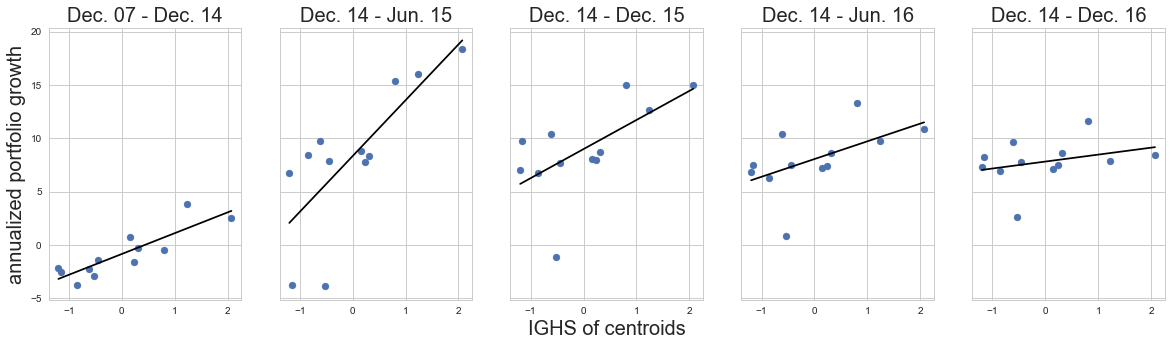

In [37]:
from sklearn.linear_model import LinearRegression

f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize=(20,5),sharey=True)

ax1.scatter(cluster_summary.sort_values('IGHS',ascending=False)['IGHS'],cluster_summary.sort_values('IGHS',ascending=False)['p1'])
lr1 = LinearRegression().fit(cluster_summary.sort_values('IGHS',ascending=False)['IGHS'].to_frame(),cluster_summary.sort_values('IGHS',ascending=False)['p1'].to_frame())
x1 = np.linspace(min(cluster_summary.sort_values('IGHS',ascending=False)['IGHS']),max(cluster_summary.sort_values('IGHS',ascending=False)['IGHS']),2)
y1 = x1*lr1.coef_[0] + lr1.intercept_
ax1.plot(x1,y1,'k')
ax1.set_title('Dec. 07 - Dec. 14',fontsize=20)
ax1.set_ylabel('annualized portfolio growth',fontsize=20)

ax2.scatter(cluster_summary.sort_values('IGHS',ascending=False)['IGHS'],cluster_summary.sort_values('IGHS',ascending=False)['p2'])
lr2 = LinearRegression().fit(cluster_summary.sort_values('IGHS',ascending=False)['IGHS'].to_frame(),cluster_summary.sort_values('IGHS',ascending=False)['p2'].to_frame())
x2 = np.linspace(min(cluster_summary.sort_values('IGHS',ascending=False)['IGHS']),max(cluster_summary.sort_values('IGHS',ascending=False)['IGHS']),2)
y2 = x2*lr2.coef_[0] + lr2.intercept_
ax2.plot(x2,y2,'k')
ax2.set_title('Dec. 14 - Jun. 15',fontsize=20)

ax3.scatter(cluster_summary.sort_values('IGHS',ascending=False)['IGHS'],cluster_summary.sort_values('IGHS',ascending=False)['p3'])
lr3 = LinearRegression().fit(cluster_summary.sort_values('IGHS',ascending=False)['IGHS'].to_frame(),cluster_summary.sort_values('IGHS',ascending=False)['p3'].to_frame())
x3 = np.linspace(min(cluster_summary.sort_values('IGHS',ascending=False)['IGHS']),max(cluster_summary.sort_values('IGHS',ascending=False)['IGHS']),2)
y3 = x3*lr3.coef_[0] + lr3.intercept_
ax3.plot(x3,y3,'k')
ax3.set_xlabel('IGHS of centroids',fontsize=20)
ax3.set_title('Dec. 14 - Dec. 15',fontsize=20)

ax4.scatter(cluster_summary.sort_values('IGHS',ascending=False)['IGHS'],cluster_summary.sort_values('IGHS',ascending=False)['p4'])
lr4 = LinearRegression().fit(cluster_summary.sort_values('IGHS',ascending=False)['IGHS'].to_frame(),cluster_summary.sort_values('IGHS',ascending=False)['p4'].to_frame())
x4 = np.linspace(min(cluster_summary.sort_values('IGHS',ascending=False)['IGHS']),max(cluster_summary.sort_values('IGHS',ascending=False)['IGHS']),2)
y4 = x4*lr4.coef_[0] + lr4.intercept_
ax4.plot(x4,y4,'k')
ax4.set_title('Dec. 14 - Jun. 16',fontsize=20)

ax5.scatter(cluster_summary.sort_values('IGHS',ascending=False)['IGHS'],cluster_summary.sort_values('IGHS',ascending=False)['p5'])
lr5 = LinearRegression().fit(cluster_summary.sort_values('IGHS',ascending=False)['IGHS'].to_frame(),cluster_summary.sort_values('IGHS',ascending=False)['p5'].to_frame())
x5 = np.linspace(min(cluster_summary.sort_values('IGHS',ascending=False)['IGHS']),max(cluster_summary.sort_values('IGHS',ascending=False)['IGHS']),2)
y5 = x5*lr5.coef_[0] + lr5.intercept_
ax5.plot(x5,y5,'k')
ax5.set_title('Dec. 14 - Dec. 16',fontsize=20)


Above, we have the income-growth health score of each cluster plotted against the annualized % growth of the corresponding sample portfolios of ZHVI medians. We see a positive correlation in all of the time periods, with the leftmost plot having a smaller intercept term. (Note that the plots above all share the same y-axis.) This, again, is likely due to the economic trouble of 2007-2009 and the ensuing years, which reduced the annualized growth over that time window. The resulting %s are thus lower than in the latter time periods, but we still see the *relationship* (positive slope of the fitted line) between income-growth health score and annualized portfolio growth.

However, we can see that the relationship becomes gradually less pronounced as we measure the annual %s over a period further into the future. In the second plot (representing a 6 months period following our income data set), there is a relatively large degree of variation in the plotted points. This is expected, since we are measuring over a shorter period of time. By the fifth plot (representing a 2 year period following our income data set), the slope of the fitted line is near zero&mdash;implying that our income-growth health scores bear a much weaker relationship to annualized portfolio growth. This result is directly related to the behavior of the kde plots we saw in section (2.1), where growth % distributions of different classes tended to converge towards each other as we measured annual returns over longer periods into the future. 

From this result, it seems that if we wish to separate regions based on their likely future growth in real estate value (i.e. strengthen the measured relationship), we must adjust our models with new income data. It is because we do not do that here, that the relationship weakens. 

Below we have a numerical summary of the plots above, described using the Pearson correlation coefficient. 

In [38]:
# Pearson's Correlation Coefficient and 2 Tailed P-Value for each region

from scipy.stats.stats import pearsonr 

print(pearsonr(cluster_summary['IGHS'],cluster_summary['p1']))
print(pearsonr(cluster_summary['IGHS'],cluster_summary['p2']))
print(pearsonr(cluster_summary['IGHS'],cluster_summary['p3']))
print(pearsonr(cluster_summary['IGHS'],cluster_summary['p4']))
print(pearsonr(cluster_summary['IGHS'],cluster_summary['p5']))

(0.86222694722920912, 0.00030878059440185687)
(0.76690771215361708, 0.0036081113425910096)
(0.63123535050436796, 0.027714087845638995)
(0.54595662553982516, 0.066311461220699641)
(0.31222379464389644, 0.32314414026226368)


In [39]:
cols = ['p1','p2','p3','p4','p5']
PCC = []
pvalue = []
periods = list(range(1,6))
for i in range(5):
    PCC.append(pearsonr(cluster_summary['IGHS'],cluster_summary[cols[i]])[0])
    pvalue.append(pearsonr(cluster_summary['IGHS'],cluster_summary[cols[i]])[1])

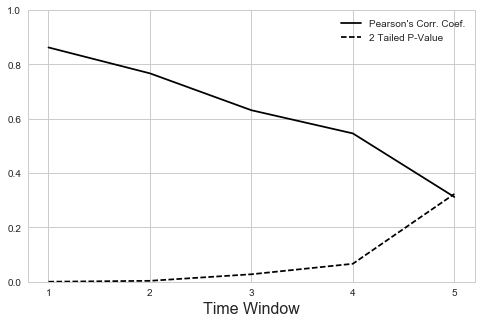

In [40]:
f, ax1 = plt.subplots(1,1,figsize=(8,5))

ax1.plot(periods,PCC,'k')
ax1.plot(periods,pvalue,'--k')
plt.ylim([0,1])
plt.xticks([1,2,3,4,5])
ax1.set_xlabel('Time Window',fontsize=16)
ax1.legend(['Pearson\'s Corr. Coef.','2 Tailed P-Value'])

The coefficients and two-tailed p-values are printed in the order that the plots were made above.

Notice that the correlation coefficient is highest for the first window of time, and gradually decreases as we project further into the future. Despite the fitted line of the second plot having the greatest slope, the high volatility in the plotted points weakens the relationship (as measured by the Pearson correlation coefficient). The better goodness-of-fit ("tightness" of the plotted points around the fitted line) in the leftmost plot is what results in a higher coefficient value. Additionally, the two-tailed p-value increases as we move down the list&mdash;also implying a relationship that is statistically weakening.

Below, we run the same analysis with IGHS applied individual regions and measured against annualized percentage returns on those individual regions.

In [41]:
individual_returns = pd.DataFrame(columns=['zipcode','p1','p2','p3','p4','p5'])
individual_returns['zipcode'] = zhvi_growth.transpose()[129:].dropna(axis=1).transpose().index
individual_returns = individual_returns.set_index('zipcode')

In [42]:
individual_returns['p1'] = (((zhvi_growth.transpose()[129:].dropna(axis=1).transpose()['2014-12']/zhvi_growth.transpose()[129:].dropna(axis=1).transpose()['2007-12'])-1)/7)*100
individual_returns['p2'] = (((zhvi_growth.transpose()[129:].dropna(axis=1).transpose()['2015-06']/zhvi_growth.transpose()[129:].dropna(axis=1).transpose()['2014-12'])-1)/0.5)*100
individual_returns['p3'] = (((zhvi_growth.transpose()[129:].dropna(axis=1).transpose()['2015-12']/zhvi_growth.transpose()[129:].dropna(axis=1).transpose()['2014-12'])-1))*100
individual_returns['p4'] = (((zhvi_growth.transpose()[129:].dropna(axis=1).transpose()['2016-06']/zhvi_growth.transpose()[129:].dropna(axis=1).transpose()['2014-12'])-1)/1.5)*100
individual_returns['p5'] = (((zhvi_growth.transpose()[129:].dropna(axis=1).transpose()['2016-12']/zhvi_growth.transpose()[129:].dropna(axis=1).transpose()['2014-12'])-1)/2)*100

In [43]:
ca_income_change1['IGHS'] = ca_income_change1.apply(IGHS,axis=1)
ca_income_change1['IGHS'] = (ca_income_change1['IGHS']-ca_income_change1['IGHS'].mean())/ca_income_change1['IGHS'].std()

In [44]:
individual_returns['IGHS'] = np.NaN
for zc in individual_returns.index:
    if str(zc) in ca_income_change1.index:
        individual_returns.loc[zc,'IGHS'] = ca_income_change1.loc[str(zc),'IGHS']
        
individual_returns = individual_returns.dropna()

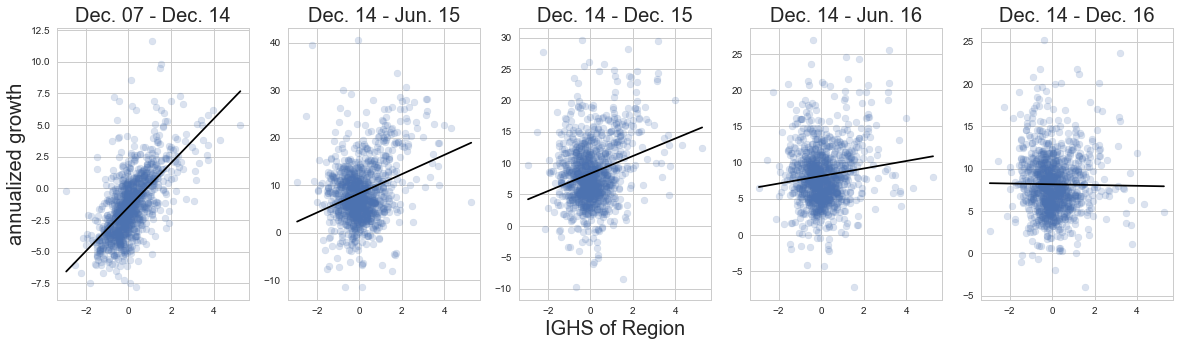

In [45]:
fig = plt.figure(figsize=(20,5))

titles = ['Dec. 07 - Dec. 14','Dec. 14 - Jun. 15','Dec. 14 - Dec. 15','Dec. 14 - Jun. 16','Dec. 14 - Dec. 16']

for i in range(5):
    ax1 = fig.add_subplot(1,5,i+1)
    ax1.scatter(individual_returns['IGHS'],individual_returns[individual_returns.columns[i]],alpha=0.2)
    lr1 = LinearRegression().fit(individual_returns['IGHS'].to_frame(),individual_returns[individual_returns.columns[i]].to_frame())
    x1 = np.linspace(min(individual_returns['IGHS']),max(individual_returns['IGHS']),2)
    y1 = x1*lr1.coef_[0] + lr1.intercept_
    ax1.plot(x1,y1,'k')
    ax1.set_title(titles[i],fontsize=20)
    if i==0:
        ax1.set_ylabel('annualized growth',fontsize=20)
    if i==2:
        ax1.set_xlabel('IGHS of Region',fontsize=20)

In [46]:
# Pearson's Correlation Coefficient and 2 Tailed P-Value for each region

print(pearsonr(individual_returns['IGHS'],individual_returns['p1']))
print(pearsonr(individual_returns['IGHS'],individual_returns['p2']))
print(pearsonr(individual_returns['IGHS'],individual_returns['p3']))
print(pearsonr(individual_returns['IGHS'],individual_returns['p4']))
print(pearsonr(individual_returns['IGHS'],individual_returns['p5']))

(0.633077992773034, 2.9599995102461633e-124)
(0.29744298989238133, 6.5737030139549614e-24)
(0.25674590199028985, 5.103416583164244e-18)
(0.11974526126519493, 6.8533959525192133e-05)
(-0.011852542390658794, 0.69456233833698633)


In [47]:
cols = ['p1','p2','p3','p4','p5']
PCC = []
pvalue = []
periods = list(range(1,6))
for i in range(5):
    PCC.append(pearsonr(individual_returns['IGHS'],individual_returns[cols[i]])[0])
    pvalue.append(pearsonr(individual_returns['IGHS'],individual_returns[cols[i]])[1])

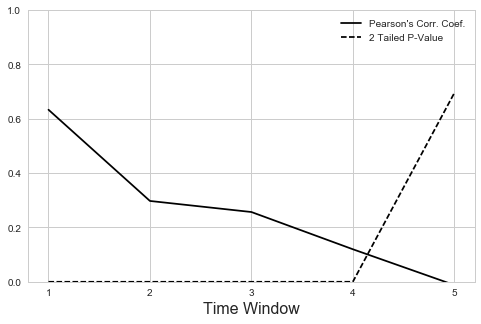

In [48]:
f, ax1 = plt.subplots(1,1,figsize=(8,5))

ax1.plot(periods,PCC,'k')
ax1.plot(periods,pvalue,'--k')
plt.ylim([0,1])
plt.xticks([1,2,3,4,5])
ax1.set_xlabel('Time Window',fontsize=16)
ax1.legend(['Pearson\'s Corr. Coef.','2 Tailed P-Value'])

---

# - Case Studies -

Below, we explore two regions as an illustration for how we could approach analyzing the growth characteristics of individual zip codes.

## Santa Clara, CA 95054 (Cluster 9)

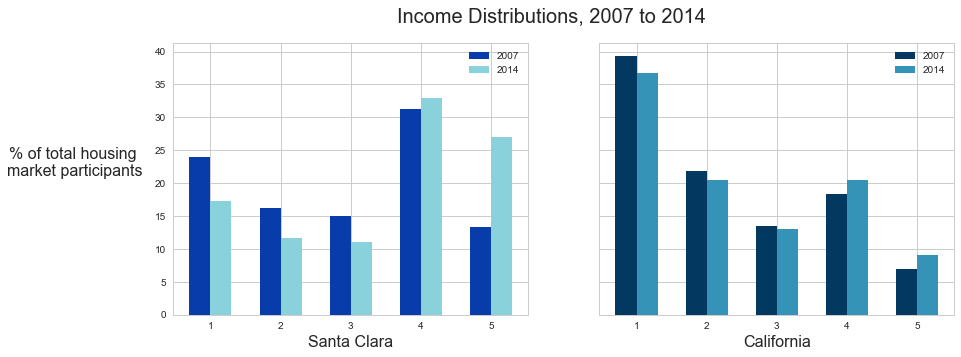

In [49]:
# income brackets

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(14,5))

ax1.bar([1-0.15,2-0.15,3-0.15,4-0.15,5-0.15],ca_tax_normalized.loc['95054']['tax_returns_2007_%'],width=0.3,facecolor='#083CAA')
ax1.bar([1+0.15,2+0.15,3+0.15,4+0.15,5+0.15],ca_tax_normalized.loc['95054']['tax_returns_2014_%'],width=0.3,facecolor='#89D2DC')
ax1.set_ylabel('% of total housing \nmarket participants',rotation=0,labelpad=80,fontsize=16)
ax1.set_xlabel('Santa Clara',fontsize=16)
ax1.legend(['2007','2014'])

ax2.bar([1-0.15,2-0.15,3-0.15,4-0.15,5-0.15],ca_tax_normalized.loc['0']['tax_returns_2007_%'],width=0.3,facecolor='#033860')
ax2.bar([1+0.15,2+0.15,3+0.15,4+0.15,5+0.15],ca_tax_normalized.loc['0']['tax_returns_2014_%'],width=0.3,facecolor='#3493B7')
ax2.set_xlabel('California',fontsize=16)
ax2.legend(['2007','2014'])

plt.suptitle('Income Distributions, 2007 to 2014', fontsize=20)

Compared to the change in earnings of all Californians, Santa Clara has a much greater increase in the \$200,000+ income bracket from 2007 to 2014 and a noticeably greater decrease in each of the three lower income brackets. The change is unlikely to be the result of prior residents increasing their earning potential. (The result of such a change would be less stark. In particular, the middle brackets would not noticeably decrease: earners from the bracket below them would enter the middle brackets. Additionally, the highest bracket would not increase by the large amount we observe here.)

It is more reasonable to think that the change was a result of the immigration of high-earners into Santa Clara. That is, an underlying change in the industries and available employment opportunities attracted a different demographic. This is causing a change in the population itself, rather than a change in the earnings of the original population.

1: 25k-50k bracket: -1.52 standard deviations above/below the mean
2: 50k-75k bracket: -1.47 standard deviations above/below the mean
3: 75k-100k bracket: -1.96 standard deviations above/below the mean
4: 100k-200k bracket: -0.33 standard deviations above/below the mean
5: >200k bracket: 4.64 standard deviations above/below the mean


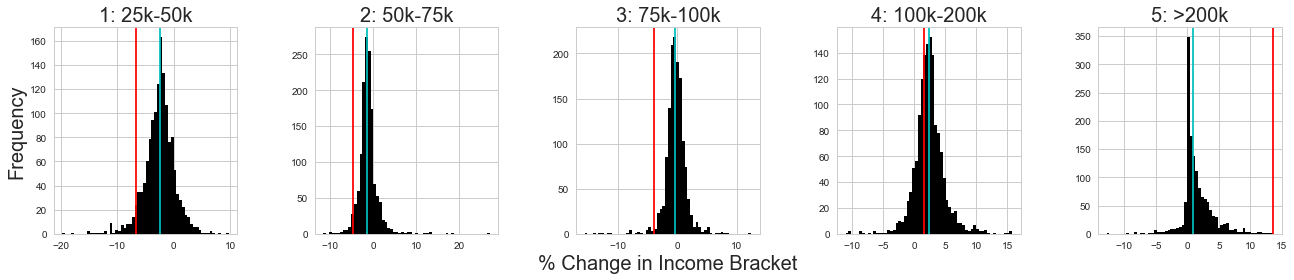

In [50]:
# changes in income brackets

fig = plt.figure(figsize=(18,4))

for col in ca_income_change1.columns:
    if col == 'cluster':
        break
    SD = ca_income_change1.describe()[col].loc['std']
    deviation = (ca_income_change1.loc['95054'][col] - ca_income_change1.describe()[col].loc['mean'])/SD
    print(str(col) + ' bracket: ' + "%.2f" % deviation + ' standard deviations above/below the mean')

for i in range(len(ca_income_change1.columns)-2):
    ax1 = fig.add_subplot(1,5,i+1)
    ax1.hist(ca_income_change1[ca_income_change1.columns[i]],bins=60,color='k')
    ax1.axvline(ca_income_change1[ca_income_change1.columns[i]].describe().loc['50%'],color='c')
    ax1.axvline(ca_income_change1.loc['95054'][ca_income_change1.columns[i]],color='r')
    ax1.set_title(str(ca_income_change1.columns[i]),fontsize=20)
    if i==0:
        ax1.set_ylabel('Frequency',fontsize=20)
    if i==2:
        ax1.set_xlabel('% Change in Income Bracket',fontsize=20)

plt.tight_layout()   

The red line represents the % change observed in 95054; the black line represents the mean for California (over all clusters). There are significant decreases in the lower brackets, as well as a remarkably large increase in the highest bracket. 

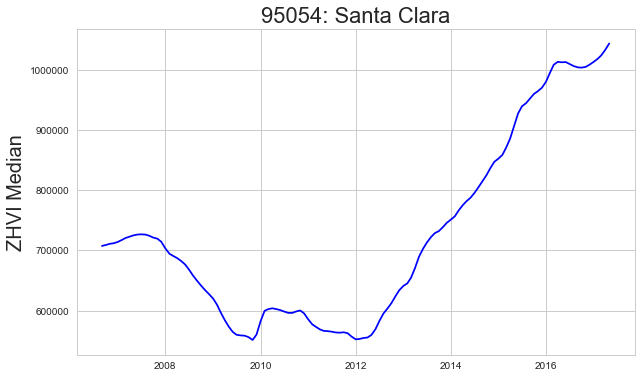

In [51]:
dates95054 = pd.to_datetime(zhvi_growth.loc[95054][125:].index)
prices95054 = zhvi_growth.loc[95054][125:].values

f, ax1 = plt.subplots(1,1,figsize=(10,6))

ax1.plot(dates95054,prices95054,'b')
ax1.set_title('95054: Santa Clara',fontsize=22)
ax1.set_ylabel('ZHVI Median',fontsize=20)


---

## Mendocino County, CA 95460 (Cluster 2)

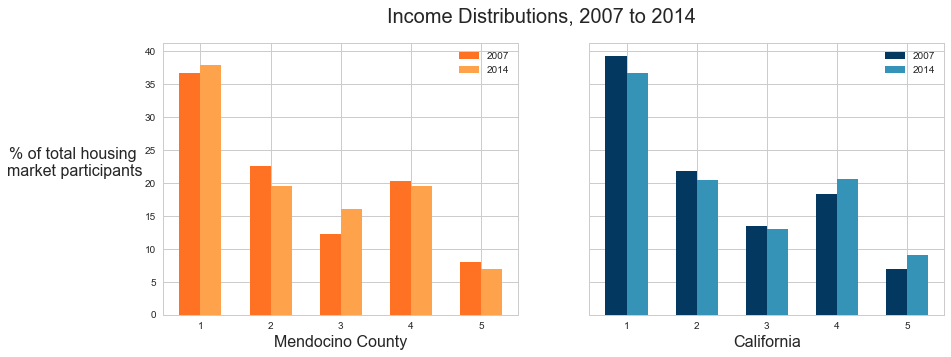

In [52]:
# income brackets

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(14,5))

ax1.bar([1-0.15,2-0.15,3-0.15,4-0.15,5-0.15],ca_tax_normalized.loc['95460']['tax_returns_2007_%'],width=0.3,facecolor='#ff7123')
ax1.bar([1+0.15,2+0.15,3+0.15,4+0.15,5+0.15],ca_tax_normalized.loc['95460']['tax_returns_2014_%'],width=0.3,facecolor='#ffa24c')
ax1.set_ylabel('% of total housing \nmarket participants',rotation=0,labelpad=70,fontsize=16)
ax1.set_xlabel('Mendocino County',fontsize=16)
ax1.legend(['2007','2014'])

ax2.bar([1-0.15,2-0.15,3-0.15,4-0.15,5-0.15],ca_tax_normalized.loc['0']['tax_returns_2007_%'],width=0.3,facecolor='#033860')
ax2.bar([1+0.15,2+0.15,3+0.15,4+0.15,5+0.15],ca_tax_normalized.loc['0']['tax_returns_2014_%'],width=0.3,facecolor='#3493B7')
ax2.set_xlabel('California',fontsize=16)
ax2.legend(['2007','2014'])

plt.suptitle('Income Distributions, 2007 to 2014', fontsize=20)

1: 25k-50k bracket: 1.35 standard deviations above/below the mean
2: 50k-75k bracket: -0.83 standard deviations above/below the mean
3: 75k-100k bracket: 2.21 standard deviations above/below the mean
4: 100k-200k bracket: -1.30 standard deviations above/below the mean
5: >200k bracket: -1.01 standard deviations above/below the mean


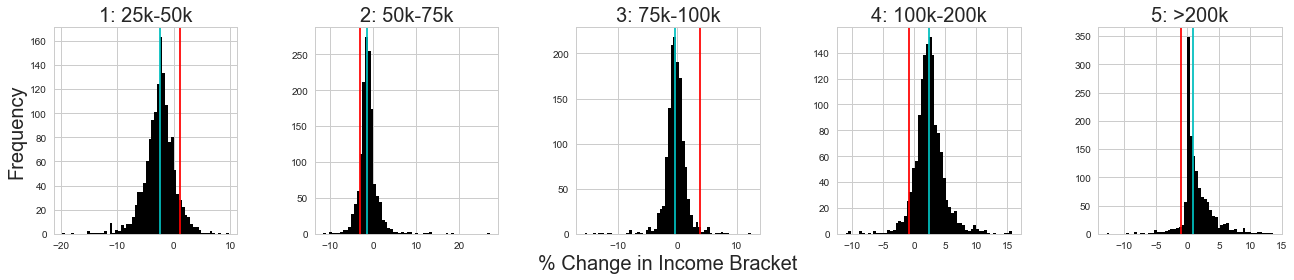

In [53]:
# changes in income brackets

fig = plt.figure(figsize=(18,4))

for col in ca_income_change1.columns:
    if col == 'cluster':
        break
    SD = ca_income_change1.describe()[col].loc['std']
    deviation = (ca_income_change1.loc['95460'][col] - ca_income_change1.describe()[col].loc['mean'])/SD
    print(str(col) + ' bracket: ' + "%.2f" % deviation + ' standard deviations above/below the mean')

for i in range(len(ca_income_change1.columns)-2):
    ax1 = fig.add_subplot(1,5,i+1)
    ax1.hist(ca_income_change1[ca_income_change1.columns[i]],bins=60,color='k')
    ax1.axvline(ca_income_change1[ca_income_change1.columns[i]].describe().loc['50%'],color='c')
    ax1.axvline(ca_income_change1.loc['95460'][ca_income_change1.columns[i]],color='r')
    ax1.set_title(str(ca_income_change1.columns[i]),fontsize=20)
    if i==0:
        ax1.set_ylabel('Frequency',fontsize=20)
    if i==2:
        ax1.set_xlabel('% Change in Income Bracket',fontsize=20)

plt.tight_layout()   

For Mendocino County, we see a less favorable pattern of income distribution changes. The top two brackets had below-average growth (in fact, they were negative--the proportions decreased) and the lowest bracket increased in proportion. 

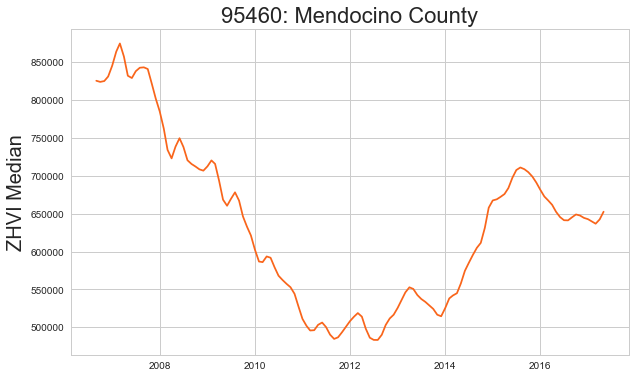

In [54]:
dates95460 = pd.to_datetime(zhvi_growth.loc[95460][125:].index)
prices95460 = zhvi_growth.loc[95460][125:].values

f, ax1 = plt.subplots(1,1,figsize=(10,6))

ax1.plot(dates95460,prices95460,'#f9651b')
ax1.set_title('95460: Mendocino County',fontsize=22)
ax1.set_ylabel('ZHVI Median',fontsize=20)


---

## Test Set

In [55]:
test = pd.read_excel(os.getcwd()+'\data_clean\properties test set.xlsx')
test = test.fillna('')

In [56]:
ca_income_change1.loc[list(np.unique(test['zipcode'].astype(str)))].sort_values('IGHS',ascending=False)

,1: 25k-50k,2: 50k-75k,3: 75k-100k,4: 100k-200k,5: >200k,cluster,IGHS
zipcode,,,,,,,
90292,-4.146367,-3.174431,-1.608475,4.630890,4.298383,1,1.354536
90045,-5.646175,-1.945737,0.644221,2.629204,4.318486,0,1.334581
90046,-5.273282,-0.311768,0.882458,2.738580,1.964013,0,0.603720
91307,-1.983989,-1.857438,-2.145410,3.105439,2.881398,4,0.307233
91406,-3.550964,-0.920699,0.315629,3.221998,0.934036,0,0.141679
91403,-3.980963,-0.008550,0.106258,2.639672,1.243583,0,0.140068
91344,-2.120445,-1.983828,-0.634051,3.336529,1.401795,6,0.063364
90049,-2.418760,-0.812035,-0.136197,0.378598,2.988394,4,0.025677
91401,-2.440105,-0.498238,-0.546649,1.483089,2.001903,6,-0.093660
